# Brain Tumor Detection using YOLOv8

In this project, we are going to build a Object detection model, by fine-tuning our YOLOv8 pre-trained model from ultralytics on Brain MRI scan for finding Tumors

At the end of day, this project, helps detect Tumors given a Brain MRI scan


Dataset used: https://www.kaggle.com/datasets/davidbroberts/brain-tumor-object-detection-datasets/data

In [1]:
!pip install ultralytics
from ultralytics import YOLO

import torch
import torchvision

import numpy
import matplotlib.pyplot as plt

### Downloading dataset from Kaggle

We are going to use Kaggle API to download the dataset as zip file in the colab files

In [2]:
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d davidbroberts/brain-tumor-object-detection-datasets

brain-tumor-object-detection-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-tumor-object-detection-datasets.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

## YOLOv8 model inference

We will load in YOLOv8 models and we are going to run a quick inference with them


In [5]:
from ultralytics import YOLO

# Load a model
infernce_model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

In [6]:
results = infernce_model("https://ultralytics.com/images/bus.jpg", conf=0.5, show=True, save=True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 220.4ms
Speed: 4.5ms preprocess, 220.4ms inference, 789.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3


In [7]:
!yolo predict model=yolov8s.pt source='https://ultralytics.com/images/zidane.jpg'

Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/zidane.jpg: 384x640 2 persons, 2 ties, 300.7ms
Speed: 2.2ms preprocess, 300.7ms inference, 1356.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Visualizing our Dataset samples

In [9]:
import glob

# Get all train images path
train_images_path = glob.glob('/content/axial_t1wce_2_class/images/train/*')

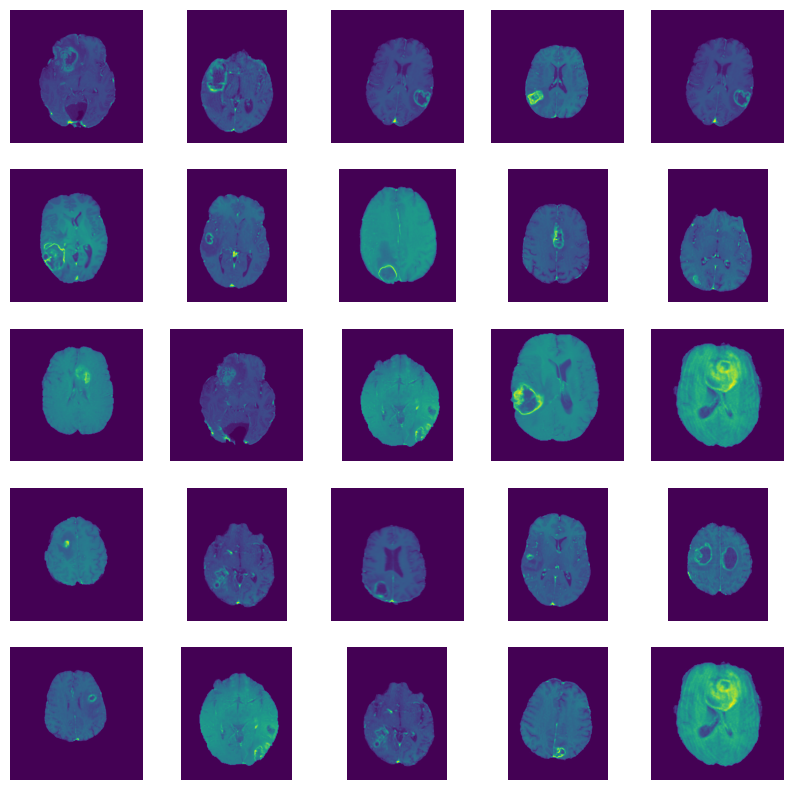

In [10]:
import random
import matplotlib.pyplot as plt

# take random sample
rows = 5
cols = 5

plt.figure(figsize=(10, 10))

for idx in range(25):
  sample_img = plt.imread(random.choice(train_images_path))
  plt.subplot(rows, cols, idx+1)
  plt.imshow(sample_img)
  plt.axis(False);

## Fine-tuning YOLOv8 model on Brain tumor detection data

In [11]:
# Build config.yaml file

%%writefile google_colab_config.yaml

# PATHS
path: /content/axial_t1wce_2_class
train: images/train/
val: images/test/

# Classes
nc: 2
names: ['negative', 'positive']

Overwriting google_colab_config.yaml


In [12]:
# device agnostic code
device = 'cuda' if  torch.cuda.is_available() else 'cpu'
device

'cuda'

In [13]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt").to(device)

model.train(data='/content/google_colab_config.yaml', epochs=200, patience=0)

engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/google_colab_config.yaml, epochs=200, time=None, patience=0, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, 

train: Scanning /content/axial_t1wce_2_class/labels/train.cache... 296 images, 14 backgrounds, 0 corrupt: 100%|██████████| 310/310 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/axial_t1wce_2_class/labels/test.cache... 75 images, 0 backgrounds, 0 corrupt: 100%|██████████| 75/75 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.15G      1.656      4.528      1.479         13        640: 100%|██████████| 20/20 [00:09<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         75         81      0.733      0.272      0.351      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      4.21G      1.244      2.187      1.204         12        640: 100%|██████████| 20/20 [00:06<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

                   all         75         81      0.147      0.136     0.0979     0.0716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.37G      1.219      1.602       1.17          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         75         81      0.019      0.123     0.0144    0.00637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200       4.2G      1.261      1.491      1.164          7        640: 100%|██████████| 20/20 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         75         81      0.842      0.753      0.841      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      4.23G      1.286      1.666      1.199          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         75         81      0.834      0.654      0.808      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      4.21G      1.187       1.44      1.134         15        640: 100%|██████████| 20/20 [00:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         75         81      0.707      0.714      0.746      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200       4.2G      1.227      1.429      1.174          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75         81      0.339       0.21       0.22      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.37G      1.164      1.293      1.156         12        640: 100%|██████████| 20/20 [00:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         75         81      0.521       0.47      0.542      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      4.36G      1.154      1.257      1.145         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         75         81      0.442      0.321      0.337      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      4.37G      1.142      1.177      1.088         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75         81     0.0293       0.16     0.0171     0.0122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       4.2G      1.147      1.252      1.157         12        640: 100%|██████████| 20/20 [00:06<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         75         81     0.0633      0.259     0.0789     0.0503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      4.21G      1.136      1.209      1.136         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]

                   all         75         81     0.0467      0.802     0.0442     0.0301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      4.36G      1.097      1.111      1.086          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75         81      0.717       0.58      0.719      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200       4.2G      1.136      1.084      1.111         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         75         81      0.761      0.889      0.833      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      4.36G      1.085      1.017      1.099         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         75         81      0.802      0.799      0.834      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200       4.2G      1.097      1.077      1.116         18        640: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         75         81      0.748      0.765      0.826      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      4.21G      1.053      1.077      1.074         15        640: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         75         81      0.618       0.78      0.745      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      4.36G      1.088     0.9799       1.06         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         75         81      0.809      0.778      0.831      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200       4.2G      1.102      1.001      1.093          5        640: 100%|██████████| 20/20 [00:07<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.68it/s]

                   all         75         81      0.698      0.778      0.776      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      4.36G      1.064     0.8832      1.062          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         75         81      0.717      0.876      0.872      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200       4.2G      0.995     0.8873       1.04         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         75         81      0.724      0.852      0.827      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200       4.2G     0.9789     0.8787       1.03          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         75         81      0.873       0.85      0.901      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      4.21G      1.001     0.9331      1.047         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         75         81      0.837      0.758      0.835      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200       4.2G     0.9987     0.9023      1.054          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all         75         81      0.742      0.569      0.746      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200       4.2G      1.002     0.9096      1.047          9        640: 100%|██████████| 20/20 [00:06<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         75         81      0.718      0.723      0.748      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200       4.2G     0.9985     0.9018      1.065          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         75         81      0.669      0.741      0.794      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      4.36G     0.9984     0.9184      1.053         12        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]


                   all         75         81      0.835      0.874      0.904       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      4.36G      0.957     0.8846      1.032         15        640: 100%|██████████| 20/20 [00:05<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         75         81      0.661      0.938       0.83      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      4.19G      0.999     0.8813      1.052          5        640: 100%|██████████| 20/20 [00:06<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         75         81      0.859       0.75      0.853      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      4.36G     0.9266     0.8519     0.9948         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         75         81      0.707      0.863      0.834      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200       4.2G     0.9867     0.8465      1.055         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]

                   all         75         81      0.443      0.815      0.645      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200       4.2G     0.9571      0.833      1.012         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         75         81      0.782      0.666      0.813      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200       4.2G     0.9315     0.8042       1.02         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         75         81      0.755      0.741      0.831      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200       4.2G     0.9687     0.7719      1.018          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]

                   all         75         81      0.762      0.868      0.849      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200       4.2G     0.9481     0.7649      1.023         13        640: 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.02it/s]

                   all         75         81      0.781      0.704      0.792      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200       4.2G     0.9175     0.7416     0.9843          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         75         81      0.766      0.809      0.834      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      4.36G     0.8864     0.7424     0.9856          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         75         81      0.833      0.675      0.823      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      4.36G      0.915     0.7804      1.017          6        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         75         81      0.784      0.506      0.741      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      4.36G     0.9234     0.7769      1.001         16        640: 100%|██████████| 20/20 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.68it/s]

                   all         75         81      0.702      0.758      0.803      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      4.36G     0.9381     0.7859      1.014          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         75         81      0.774      0.778      0.822      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      4.35G     0.9242     0.7696      1.017          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         75         81      0.622      0.812      0.778      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      4.36G     0.9003     0.7339      1.006          6        640: 100%|██████████| 20/20 [00:06<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         75         81      0.892      0.815      0.878      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      4.37G     0.9331     0.7287      1.016         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.10it/s]

                   all         75         81      0.733      0.644      0.807      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      4.36G     0.9161     0.7583     0.9972          7        640: 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         75         81      0.734      0.854      0.863      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      4.36G     0.8874     0.7053     0.9914          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         75         81      0.701      0.869      0.816      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200       4.2G     0.9318     0.7456       1.02          8        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         75         81      0.755      0.645      0.776       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      4.36G     0.8898     0.7403      0.994          3        640: 100%|██████████| 20/20 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         75         81      0.843       0.84      0.876      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200       4.2G     0.8744     0.6851     0.9949         11        640: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         75         81      0.825      0.814       0.88      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200       4.2G      0.849     0.7199     0.9769          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         75         81      0.836      0.802      0.865      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200       4.2G     0.9118     0.6863     0.9983         13        640: 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.54it/s]

                   all         75         81      0.782      0.755      0.822      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      4.21G     0.8578      0.668     0.9876         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         75         81      0.841      0.851      0.889      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200       4.2G      0.882     0.6876      1.009         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]

                   all         75         81      0.743      0.852      0.832      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200       4.2G     0.8949     0.6885          1          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         75         81      0.755      0.801      0.825      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200       4.2G     0.8189      0.616     0.9633          6        640: 100%|██████████| 20/20 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]

                   all         75         81       0.71      0.704      0.799      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      4.35G     0.8262     0.7199     0.9751          2        640: 100%|██████████| 20/20 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         75         81      0.852      0.641      0.754      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200       4.2G     0.9088     0.6853      1.053          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]

                   all         75         81       0.67      0.642      0.704      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200       4.2G     0.8673     0.6421      1.006          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         75         81      0.779      0.827      0.852      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200       4.2G     0.8418     0.6407     0.9772          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.61it/s]

                   all         75         81      0.827       0.79      0.854      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200       4.2G     0.8084     0.5929     0.9587         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         75         81      0.873      0.848      0.891      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200       4.2G     0.8268     0.5815     0.9605         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         75         81      0.658      0.901      0.862      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200       4.2G     0.8644     0.6026      0.985         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         75         81      0.844      0.735      0.874      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200       4.2G     0.8443     0.6076     0.9869         13        640: 100%|██████████| 20/20 [00:07<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         75         81      0.849      0.753      0.855      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200       4.2G     0.8223     0.5955     0.9598          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.49it/s]

                   all         75         81      0.754      0.605      0.758      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      4.36G     0.8198     0.5838     0.9847         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         75         81      0.826      0.877      0.904      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200       4.2G     0.8615     0.5851     0.9762         16        640: 100%|██████████| 20/20 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         75         81      0.766       0.79      0.843      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200       4.2G     0.8611     0.5982      0.985         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         75         81      0.851      0.765      0.867      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      4.36G     0.7877     0.5742     0.9611         13        640: 100%|██████████| 20/20 [00:06<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         75         81      0.799      0.852      0.873      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      4.19G     0.7697     0.5351      0.941          5        640: 100%|██████████| 20/20 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         75         81      0.795      0.815      0.858      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      4.36G     0.7432     0.5303     0.9341         15        640: 100%|██████████| 20/20 [00:06<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         75         81      0.768      0.815      0.858      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      4.19G     0.8011     0.5619     0.9728          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         75         81      0.887      0.827      0.878      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200       4.2G     0.7637     0.5313     0.9407         10        640: 100%|██████████| 20/20 [00:07<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75         81      0.814      0.852      0.862      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      4.36G     0.7664     0.5559     0.9541         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         75         81      0.846      0.813       0.87      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200       4.2G     0.7706      0.555     0.9327         18        640: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         75         81      0.667      0.914      0.852      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200       4.2G      0.762     0.5266     0.9542         14        640: 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         75         81      0.841      0.568      0.804      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200       4.2G     0.8012     0.5955     0.9689          7        640: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         75         81      0.843      0.661      0.859      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      4.36G     0.7424     0.5123     0.9405          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.24it/s]

                   all         75         81      0.799      0.835      0.874      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      4.36G     0.7609     0.4958     0.9523          7        640: 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75         81      0.874      0.859      0.879      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200       4.2G     0.7621     0.5375     0.9498         15        640: 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         75         81       0.83      0.852      0.863      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      4.36G     0.7238     0.4826      0.938          9        640: 100%|██████████| 20/20 [00:06<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]

                   all         75         81       0.79      0.827      0.834      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200       4.2G     0.7538     0.4979     0.9566         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.36it/s]

                   all         75         81      0.861      0.852      0.881      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200       4.2G     0.7684     0.5224     0.9435          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


                   all         75         81      0.864      0.852      0.884      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      4.36G     0.7691     0.5674     0.9622          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75         81      0.875      0.728      0.819      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      4.36G     0.7153     0.5171     0.9352         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         75         81      0.863       0.78      0.876      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      4.36G     0.7487     0.5117     0.9381          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         75         81      0.838      0.769      0.866      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      4.36G     0.6898     0.5062     0.9225         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75         81      0.741      0.778      0.736      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      4.21G     0.7443     0.5427     0.9518         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         75         81      0.897      0.617      0.848      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200       4.2G     0.6856      0.464     0.9181         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.94it/s]

                   all         75         81      0.844      0.741      0.834      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      4.21G     0.6974     0.4897     0.9168         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         75         81       0.78      0.568       0.78      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200       4.2G     0.6894     0.4519     0.9247         12        640: 100%|██████████| 20/20 [00:07<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         75         81      0.882      0.778      0.871       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      4.36G     0.6711     0.4583     0.9086         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         75         81      0.854      0.753      0.857      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200       4.2G      0.716     0.4883     0.9276         17        640: 100%|██████████| 20/20 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         75         81      0.851      0.827      0.862        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200       4.2G     0.6782     0.4554     0.9287          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         75         81      0.862       0.77       0.88       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200       4.2G      0.673     0.4507     0.9115         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75         81      0.862      0.772      0.879      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      4.36G     0.6944     0.4685     0.9202          9        640: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         75         81      0.849      0.764      0.858      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200       4.2G     0.6547     0.4473     0.9144          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.56it/s]

                   all         75         81      0.937      0.802      0.892      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      4.36G     0.6482     0.4457     0.9018          6        640: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         75         81      0.802       0.79      0.833       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200       4.2G     0.7025     0.4483     0.9203          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         75         81      0.902      0.799      0.878      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      4.36G     0.6868      0.484     0.9181          7        640: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.24it/s]

                   all         75         81      0.851      0.844      0.877      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200       4.2G     0.6783     0.4489     0.9254         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         75         81      0.839      0.864      0.899      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      4.19G     0.6655      0.432     0.9066          6        640: 100%|██████████| 20/20 [00:06<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]

                   all         75         81      0.882      0.833      0.892      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      4.36G     0.6571     0.4252     0.9183         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         75         81      0.817      0.663      0.804      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200       4.2G     0.6631     0.4496     0.9229         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         75         81      0.749      0.849       0.87      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      4.35G     0.6653     0.4553     0.9222          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         75         81      0.667      0.914      0.795      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      4.36G     0.6452     0.4486     0.8996         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         75         81      0.704      0.852      0.805      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200       4.2G     0.6706     0.4551     0.9178          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         75         81      0.774      0.803      0.872      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      4.36G     0.6465     0.4538     0.9027          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]

                   all         75         81      0.811      0.877      0.911      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200       4.2G     0.6332     0.4173     0.9004         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         75         81      0.868      0.814      0.874      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      4.36G     0.6294     0.4255      0.907          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.16it/s]

                   all         75         81      0.814      0.778      0.858      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      4.19G     0.6543     0.4178     0.9252          8        640: 100%|██████████| 20/20 [00:06<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         75         81      0.814      0.852      0.882      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      4.36G     0.6466     0.4293      0.932         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all         75         81      0.831      0.877      0.868      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200       4.2G     0.6103     0.4137     0.9198         12        640: 100%|██████████| 20/20 [00:06<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         75         81      0.841      0.864      0.879      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200       4.2G     0.6575     0.4513     0.9279          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.54it/s]

                   all         75         81       0.85      0.771      0.881      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200       4.2G     0.6462     0.4398     0.9124         10        640: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         75         81      0.878      0.714      0.859      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200       4.2G     0.6087     0.4113      0.908         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75         81      0.882      0.831      0.897      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      4.19G     0.6441     0.4255      0.912          9        640: 100%|██████████| 20/20 [00:07<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         75         81      0.817      0.829      0.868      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200       4.2G      0.616     0.4241     0.9007         11        640: 100%|██████████| 20/20 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         75         81      0.679      0.914      0.861      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      4.36G     0.6216     0.4348     0.9046         12        640: 100%|██████████| 20/20 [00:07<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         75         81      0.838      0.864      0.888      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200       4.2G     0.6284     0.4172     0.9034         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         75         81      0.882      0.852      0.906       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      4.36G     0.6195     0.3985     0.8974         11        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.53it/s]

                   all         75         81      0.926      0.864      0.907      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200       4.2G     0.6212     0.4365     0.9011          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75         81      0.893      0.827      0.905      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200       4.2G     0.6195     0.4131     0.9049         11        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         75         81      0.919      0.843      0.929      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200       4.2G     0.5664     0.4229     0.9011          2        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.18it/s]

                   all         75         81      0.886      0.867       0.91      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      4.36G     0.5828     0.3912     0.8796          9        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         75         81       0.57      0.901      0.808      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200       4.2G     0.5922     0.3961      0.886         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75         81      0.818      0.716      0.851       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      4.36G     0.5817     0.3972     0.9032          7        640: 100%|██████████| 20/20 [00:06<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         75         81       0.87      0.802      0.891       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200       4.2G      0.566     0.3681     0.8836         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         75         81      0.899      0.765      0.888      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      4.21G      0.579     0.3661     0.8636          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]

                   all         75         81      0.882      0.737      0.862       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      4.36G     0.5787     0.3926     0.8906          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         75         81      0.912      0.768      0.892      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      4.36G     0.5641     0.3817     0.8809         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         75         81      0.849      0.836      0.915      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      4.36G     0.5624     0.3786     0.8935         13        640: 100%|██████████| 20/20 [00:06<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         75         81      0.879      0.778      0.879       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200       4.2G     0.5349     0.3417     0.8808          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         75         81      0.844        0.8      0.893      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      4.36G      0.591     0.3772     0.8919          4        640: 100%|██████████| 20/20 [00:06<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         75         81      0.899       0.79      0.894      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      4.36G     0.5859     0.3663      0.913         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         75         81      0.862      0.772      0.867       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200       4.2G       0.56     0.3628     0.8893          7        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         75         81      0.878      0.728      0.843      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200       4.2G     0.5642     0.3798     0.8813         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75         81       0.86      0.834      0.882      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      4.36G     0.5704     0.3818     0.9016         13        640: 100%|██████████| 20/20 [00:07<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         75         81      0.868      0.891      0.914      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      4.36G     0.5308     0.3511     0.8699          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75         81      0.882      0.832      0.896      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200       4.2G     0.5566     0.3538     0.8846          8        640: 100%|██████████| 20/20 [00:07<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         75         81      0.802      0.798      0.885      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200       4.2G     0.5493      0.351     0.8723         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         75         81      0.837       0.84      0.887      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200       4.2G     0.5399     0.3573     0.8785          7        640: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         75         81      0.843      0.859      0.898      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      4.36G     0.5358     0.3639     0.8794         14        640: 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         75         81      0.904      0.813      0.917      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      4.36G     0.5089     0.3408     0.8563         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]

                   all         75         81      0.712      0.914      0.884      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      4.36G     0.5362     0.3477     0.8902         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.04it/s]

                   all         75         81      0.694      0.951      0.879      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      4.36G     0.5208     0.3403     0.8777         10        640: 100%|██████████| 20/20 [00:07<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

                   all         75         81      0.664      0.926      0.864      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200       4.2G     0.5124     0.3304     0.8657         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         75         81      0.768      0.901       0.86      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200       4.2G     0.5376      0.354     0.8746         10        640: 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         75         81      0.847      0.819      0.893      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200       4.2G     0.5358     0.3548     0.8763          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         75         81       0.86      0.852      0.909      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200       4.2G     0.5114     0.3444     0.8735         10        640: 100%|██████████| 20/20 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]

                   all         75         81      0.871      0.835        0.9      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200       4.2G     0.5156     0.3385     0.8607          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         75         81      0.861      0.815      0.899      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      4.36G     0.5034     0.3257     0.8776          9        640: 100%|██████████| 20/20 [00:06<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         75         81      0.835       0.79      0.872      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200       4.2G     0.5152     0.3411     0.8771         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         75         81      0.858      0.778      0.873       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200       4.2G     0.5088     0.3365     0.8779          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         75         81      0.782      0.753      0.859      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200       4.2G     0.4809     0.3094     0.8524          8        640: 100%|██████████| 20/20 [00:05<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         75         81      0.863      0.781      0.873      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      4.19G     0.4795     0.3164     0.8793          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.79it/s]

                   all         75         81      0.855      0.716      0.863      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200       4.2G     0.4997     0.3352     0.8721          9        640: 100%|██████████| 20/20 [00:06<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         75         81      0.828      0.771      0.873      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      4.36G     0.4662     0.3073     0.8587          9        640: 100%|██████████| 20/20 [00:05<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         75         81      0.895       0.79      0.876      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      4.36G     0.5173     0.3326     0.8781         12        640: 100%|██████████| 20/20 [00:06<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         75         81      0.901      0.802      0.871      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      4.35G     0.4591     0.3192     0.8558          7        640: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         75         81      0.863      0.802      0.881      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200       4.2G     0.5041     0.3372      0.873         15        640: 100%|██████████| 20/20 [00:06<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         75         81      0.762      0.829      0.855      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      4.37G     0.4697     0.3243      0.865         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         75         81      0.652      0.901      0.847      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200       4.2G     0.4962     0.3247     0.8622         16        640: 100%|██████████| 20/20 [00:07<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         75         81       0.73      0.901      0.876      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200       4.2G     0.4874     0.3162     0.8684         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         75         81      0.876      0.786      0.895      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      4.19G     0.4482      0.308     0.8439          4        640: 100%|██████████| 20/20 [00:07<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.16it/s]

                   all         75         81      0.747      0.914      0.887      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      4.21G     0.4817     0.3297     0.8627         13        640: 100%|██████████| 20/20 [00:05<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         75         81      0.883      0.838      0.897      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      4.19G     0.4784     0.3187     0.8773          5        640: 100%|██████████| 20/20 [00:07<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.71it/s]

                   all         75         81      0.768      0.901      0.899      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      4.21G     0.5166     0.3377     0.8769         14        640: 100%|██████████| 20/20 [00:05<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         75         81      0.895      0.765      0.896      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      4.36G     0.4625     0.3082     0.8689          7        640: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75         81        0.9      0.782        0.9      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200       4.2G     0.4757      0.303     0.8714         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.55it/s]

                   all         75         81       0.76      0.901      0.889      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200       4.2G     0.4566     0.3063     0.8598         12        640: 100%|██████████| 20/20 [00:06<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.03it/s]

                   all         75         81      0.777      0.901      0.892      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      4.36G     0.4344     0.2903     0.8572          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         75         81      0.877      0.802      0.889      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200       4.2G     0.4642     0.3224     0.8644          5        640: 100%|██████████| 20/20 [00:08<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         75         81        0.8      0.889      0.884       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      4.36G     0.4518     0.2944     0.8501         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         75         81      0.753      0.864      0.868      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200       4.2G     0.4515     0.2999     0.8504          7        640: 100%|██████████| 20/20 [00:06<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         75         81      0.864      0.782      0.876      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      4.36G     0.4557     0.3031     0.8693          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.46it/s]

                   all         75         81      0.871      0.815       0.89      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200       4.2G     0.4369     0.3106     0.8538          6        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.96it/s]

                   all         75         81      0.893      0.826      0.891      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200       4.2G     0.4517     0.2916     0.8595         11        640: 100%|██████████| 20/20 [00:05<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         75         81       0.89      0.815       0.88      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      4.36G     0.4256     0.2786     0.8466         10        640: 100%|██████████| 20/20 [00:07<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]

                   all         75         81      0.902      0.799      0.885      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200       4.2G     0.4203     0.2811     0.8424         12        640: 100%|██████████| 20/20 [00:05<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         75         81      0.905      0.827      0.896      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200       4.2G     0.4254     0.2784     0.8475          9        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.56it/s]

                   all         75         81      0.905      0.825       0.89      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200       4.2G      0.412      0.279      0.841         12        640: 100%|██████████| 20/20 [00:06<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         75         81      0.894      0.834      0.886      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200       4.2G     0.4338     0.3033      0.871         14        640: 100%|██████████| 20/20 [00:06<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.20it/s]

                   all         75         81      0.903      0.803       0.88      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200       4.2G     0.4155     0.2689     0.8419         15        640: 100%|██████████| 20/20 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]

                   all         75         81      0.878      0.801      0.878      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200       4.2G     0.4212     0.2786     0.8528         12        640: 100%|██████████| 20/20 [00:06<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         75         81      0.904      0.817      0.877      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      4.36G     0.4271     0.2872     0.8617          6        640: 100%|██████████| 20/20 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.20it/s]

                   all         75         81      0.917      0.814      0.876      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      4.35G     0.4164     0.2896     0.8595         10        640: 100%|██████████| 20/20 [00:05<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         75         81       0.88      0.818      0.859      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200       4.2G     0.4067      0.289     0.8613         12        640: 100%|██████████| 20/20 [00:07<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         75         81      0.869      0.823       0.87      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      4.35G     0.4121     0.2849     0.8509          5        640: 100%|██████████| 20/20 [00:05<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         75         81      0.859      0.831      0.892      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200       4.2G     0.4034     0.2751     0.8484         11        640: 100%|██████████| 20/20 [00:07<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         75         81      0.855       0.84      0.899      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200       4.2G     0.4304     0.2838     0.8655          5        640: 100%|██████████| 20/20 [00:05<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         75         81      0.868      0.815      0.893      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200       4.2G     0.4061     0.2753     0.8517          6        640: 100%|██████████| 20/20 [00:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]

                   all         75         81      0.886      0.827      0.896      0.669


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200       4.2G     0.3564     0.2322     0.7944          6        640: 100%|██████████| 20/20 [00:07<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.67it/s]

                   all         75         81       0.87      0.828      0.898      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      4.36G     0.3404     0.2166     0.8025          6        640: 100%|██████████| 20/20 [00:06<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         75         81      0.873      0.845      0.908      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      4.19G     0.3267     0.2072     0.8012          5        640: 100%|██████████| 20/20 [00:05<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.93it/s]

                   all         75         81      0.884      0.849      0.915      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200       4.2G     0.3254     0.2222     0.8009          6        640: 100%|██████████| 20/20 [00:07<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         75         81      0.884      0.843      0.915      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200       4.2G     0.3209     0.2132     0.8018          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all         75         81      0.881      0.827      0.911      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      4.36G     0.3239     0.2128     0.8043          6        640: 100%|██████████| 20/20 [00:07<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         75         81      0.881      0.824      0.911      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      4.35G     0.3308     0.2217     0.7901          6        640: 100%|██████████| 20/20 [00:07<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         75         81      0.882      0.828      0.909      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200       4.2G     0.3151      0.202     0.8079          6        640: 100%|██████████| 20/20 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         75         81      0.878      0.801      0.914      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200       4.2G     0.3091     0.2068     0.7919          6        640: 100%|██████████| 20/20 [00:05<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.26it/s]

                   all         75         81       0.91       0.79      0.898      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200       4.2G     0.3068     0.2124     0.7948          6        640: 100%|██████████| 20/20 [00:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.62it/s]

                   all         75         81        0.9       0.79      0.901      0.672



200 epochs completed in 0.445 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.239 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]


                   all         75         81      0.893      0.827      0.904      0.697
              negative         75         81      0.893      0.827      0.904      0.697
Speed: 0.3ms preprocess, 4.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b98d1515720>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [14]:
import shutil
import os



def move_folder(source_folder, destination_folder):
    """Moves an existing folder to a new location.

    Args:
        source_folder (str): The path to the folder to be moved.
        destination_folder (str): The path to the destination folder.

    Raises:
        FileNotFoundError: If the source folder doesn't exist.
        OSError: If there's an error moving the folder.
    """

    if not os.path.exists(source_folder):
        raise FileNotFoundError(f"Source folder not found: {source_folder}")

    try:
        shutil.move(source_folder, destination_folder)
        print(f"Folder moved successfully from {source_folder} to {destination_folder}")
    except OSError as e:
        raise OSError(f"Error moving folder: {e}") from e

# testing it
source_path = "/content/runs"
destination_path = "/content/drive/My Drive/brain_tumor_detection_train_results/"

move_folder(source_path, destination_path)

Folder moved successfully from /content/runs to /content/drive/My Drive/brain_tumor_detection_train_results/
